In [1]:
#------------------Parte A-------------------#

In [4]:
#Ejercicio 1
     
import requests

#busamos algun ítem de interés: Iphone 14 pro max 
buscar = "iphone 14 pro max"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))
response = requests.request("GET", url)
print(response) #Correcto 

#Chequeamos que el url sea el correcto
print(url)

#Guardamos el resultado en un diccionario (json)
data = response.json()
#data                           #para ver su contenido

<Response [200]>
https://api.mercadolibre.com/sites/MLA/search?q=iphone%2014%20pro%20max


In [6]:
#Ejercicio 2

#Cantidad de Resultados que obtenemos
print('Longitud de lista de resultados:', len(data['results']))

# Veamos el precio del primer resultado de la búsqueda
print('Precio del primer resultado:', data['results'][0]['price'])

import pandas as pd

precios = []

# Extraemos los valores de 'id' y 'price' 
for i, resultado in enumerate(data['results']): 
    if 'id' in resultado and 'price' in resultado:
        precios.append([resultado['id'], resultado['price']])  # Añadir el par [id, price]
    else:
        print(f"Faltan datos en el resultado {i}: {resultado}")

# Convertimos la lista de listas en un DataFrame
df_precios = pd.DataFrame(precios, columns=['id', 'Precio'])

# Mostramos el DataFrame
print(df_precios)


#precio promedio:
print('Precio promedio:', df_precios['Precio'].mean())   #1834099.74

#precio máximo:
print('Precio máximo:',df_precios['Precio'].max())    #5999999

#precio minimo:
print('Precio minimo:',df_precios['Precio'].min())    #145000


Longitud de lista de resultados: 50
Precio del primer resultado: 1720000
               id   Precio
0   MLA1890488344  1720000
1   MLA1934300112  1320000
2   MLA1890309638  1720000
3   MLA1452977585  1950000
4   MLA1414395007  3000000
5   MLA1870249594  2320000
6   MLA1889892184  1890000
7   MLA1853088714  1891000
8   MLA1889993976  1890000
9   MLA1385783071  3399999
10  MLA1490056284  3399999
11  MLA1489753500  5999999
12  MLA1451049867  1690000
13  MLA1454403375  1250000
14  MLA1391815411  1899999
15  MLA1453761721  1400000
16  MLA1438219007  1800000
17  MLA1441965381  1915200
18  MLA1442196997  1915200
19  MLA1454833449  1650000
20  MLA1441885423  1971200
21  MLA1441888135  1915200
22  MLA1453932713  1429991
23  MLA1441924365  1971200
24  MLA1878327128  1825600
25  MLA1442222187  1915200
26  MLA1878339542  1825600
27  MLA1441963743  1948800
28  MLA1880437516  1915200
29  MLA1875959588  1915200
30  MLA1441964143  1948800
31  MLA1933057928  1728600
32  MLA1442194915  1915200
33  MLA14

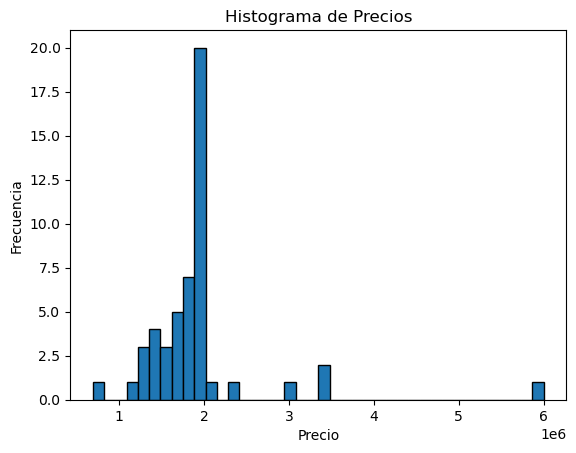

In [10]:
#Ejercicio 3
import matplotlib.pyplot as plt
import numpy as np

#para poder visualizarlo 
%matplotlib inline

plt.hist(df_precios['Precio'], bins=40, edgecolor='black')  
plt.title('Histograma de Precios')
plt.xlabel('Precio')        # muestra los precios multiplicados por 1 millón
plt.ylabel('Frecuencia')
plt.show()

#A simple vista hay 6 outliers; 2 items muy baratos y 4 items demasiado caros. El precio de la mayoria de los items ronda entre 1 y 2 millones de pesos. 

In [ ]:
#Ejercicio 4

import requests

#busamos todos los artículos de la categoría 'Juegos y Juguetes'

categoria_id = "MLA1132" #ID de la categoría 'Juegos y Juguetes'
url = "https://api.mercadolibre.com/sites/{}/search?category={}".format("MLA", categoria_id) #URL para consultar categorías
response = requests.request("GET", url)
print(response)  # Correcto.

#Chequeamos que el url sea el correcto
print('El URL es: ', url)

# Creamos listas para almacenar precios y URLs
productos = []

# Guardamos el resultado en un diccionario (json)
data2 = response.json()

# Creamos listas para almacenar precios y URLs
precios = []
urls = []
nombres = []
productos = []

# Extraemos los valores de 'id', 'price', 'title', y 'permalink'
for i, resultado in enumerate(data2['results']):
    if 'id' in resultado and 'price' in resultado and 'title' in resultado and 'permalink' in resultado:
        # Añadir 'accepts_mercadopago' en el caso de que esté disponible
        acepta_mp = resultado.get('accepts_mercadopago', False)  # Obtiene el valor de 'accepts_mercadopago' o False si no está presente
        productos.append([resultado['id'], resultado['price'], resultado['title'], acepta_mp, categoria_id, resultado['permalink']])  # Añadir el par [id, price, title, accepts_mercadopago, category, permalink]
    else:
        print(f"Faltan datos en el resultado {i}: {resultado}")

# Convertimos la lista de listas en un DataFrame
df_productos = pd.DataFrame(productos, columns=['ID', 'Precio', 'Nombre', 'Acepta Mercado Pago', 'Categoría', 'URL'])

# Producto más barato
precio_minimo = df_productos['Precio'].min() #Buscamos el producto con el menor precio
producto_minimo = df_productos[df_productos['Precio'] == precio_minimo].iloc[0] #Guardamos las características del producto
url_minimo = producto_minimo['URL'] #Guardamos el link

print(f'El producto más barato es "{producto_minimo["Nombre"]}" con un precio de ${precio_minimo}. Podés encontrarlo en: {producto_minimo["URL"]}.')

# Producto más caro
precio_maximo = df_productos['Precio'].max() #Buscamos el producto con el menor precio
producto_maximo = df_productos[df_productos['Precio'] == precio_maximo].iloc[0] #Guardamos las características del producto
url_maximo = producto_maximo['URL'] #Guardamos el link

print(f'El producto más caro es "{producto_maximo["Nombre"]}" con un precio de ${precio_maximo}. Podés encontrarlo en: {producto_maximo["URL"]}.')

# Diferencia de precios entre el más barato y el más caro
diferencia_precio = precio_maximo - precio_minimo
print(f'Entre el producto más barato y el más caro hay ${diferencia_precio} de diferencia.')

# Cantidad de productos que aceptan Mercado Pago
cantidad_aceptan_mp = df_productos['Acepta Mercado Pago'].sum()
total_productos = len(df_productos)
porcentaje_aceptan_mp = (cantidad_aceptan_mp / total_productos) * 100

print('Cantidad de productos que aceptan Mercado Pago:', cantidad_aceptan_mp)
print('Porcentaje de productos que aceptan Mercado Pago: {:.2f}%'.format(porcentaje_aceptan_mp))


## Parte B

### Ejercicio 5
De la página de noticias del diario La Nación, utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

In [60]:
# Instalamos las librerías necesarias. Eliminar los '#' de las tres siguientes líneas si no tiene las librerías.
#!pip install requests 
#!pip install BeautifulSoup 
#!pip install pandas

ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [62]:
# Importamos las librerías
import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator
from IPython.display import Image #to display an image

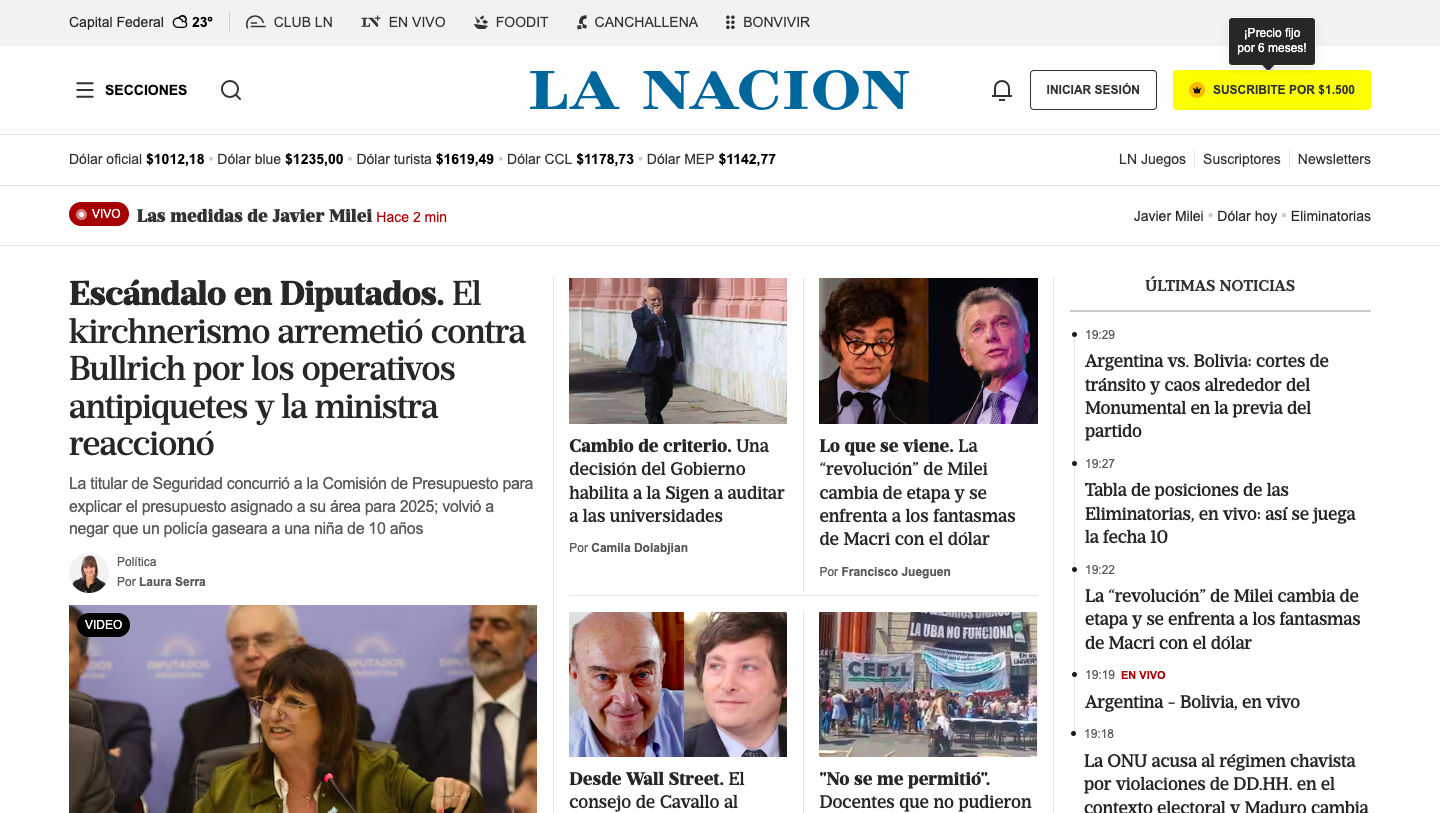

In [64]:
# Mostramos una captura de la portada de La Nación de la fecha en que se realizó el trabajo
Image(filename='portada_ln_15092024.png')

In [66]:
# Guardo el URL de la página del diario de La Nación
url = "https://www.lanacion.com.ar"

In [68]:
# Traigo el contenido del URL a mi dispositivo
r = requests.get(url) #traigo el contenido del html
contenido = r.content

In [70]:
# Procesamos el contenido obtenido del URL para poder trabajar con el código HTML
soup = BeautifulSoup(contenido, "html.parser")

In [73]:
# Encontramos todos los elementos <a> (links) con el atributo href
links = soup.find_all('a', class_='link ln-link flex flex-column --unstyled')

print(type(links))
print('\n', links)

<class 'bs4.element.ResultSet'>

 [<a class="link ln-link flex flex-column --unstyled" href="/politica/para-flaco-el-kirchnerismo-arremetio-duro-contra-bullrich-por-los-operativos-antipiquetes-y-la-nid15102024/" target="_self" title="Escándalo en Diputados. El kirchnerismo arremetió contra Bullrich por los operativos antipiquetes y la ministra reaccionó"><section class="media-container" href="/politica/para-flaco-el-kirchnerismo-arremetio-duro-contra-bullrich-por-los-operativos-antipiquetes-y-la-nid15102024/" title="El kirchnerismo arremetió contra Bullrich por los operativos antipiquetes y la ministra reaccionó"><picture class="ln-placeholder flex jc-center ai-center relative ratio-3-2"><source media="(min-width: 768px)" srcset="https://www.lanacion.com.ar/resizer/v2/la-ministra-de-seguridad-patricia-bullrich-se-AYNXQ6XMVVHFNC7AL4JIRZFGFE.jpg?auth=10312133197b52da07847e746d35d130ba5b0bcb7446f9f8b5e79219fd3bcbef&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true"/><img alt="El 

In [36]:
# Creamos una lista para guardar los links
news_links = []

# Para cada una de las noticias, obtenemos el url, lo completamos con el dominio común de La Nación y lo agregamos a la lista creada
for link in links:
    href = link.get('href')
    print(href)

    href = url + href
    
    news_links.append({
        'link': href
    })

/politica/para-flaco-el-kirchnerismo-arremetio-duro-contra-bullrich-por-los-operativos-antipiquetes-y-la-nid15102024/
/politica/cambio-de-criterio-una-decision-del-gobierno-habilita-a-la-sigen-a-auditar-a-las-universidades-nid15102024/
/economia/la-revolucion-de-milei-cambia-de-etapa-y-se-enfrenta-a-los-fantasmas-de-macri-nid15102024/
/economia/el-consejo-de-cavallo-al-gobierno-desde-wall-street-nid15102024/
/sociedad/division-entre-los-alumnos-y-docentes-a-los-que-les-impidieron-entrar-a-dar-clase-en-dos-facultades-nid15102024/
/deportes/futbol/argentina-bolivia-en-vivo-nid15102024/
/politica/fuertes-criticas-a-las-imposiciones-de-la-union-europea-en-una-reunion-regional-de-legisladores-nid15102024/
/politica/para-flaco-el-kirchnerismo-arremetio-duro-contra-bullrich-por-los-operativos-antipiquetes-y-la-nid15102024/
/economia/dolar/dolar-hoy-dolar-blue-hoy-a-cuanto-cotiza-este-martes-15-de-octubre-nid15102024/
/economia/la-revolucion-de-milei-cambia-de-etapa-y-se-enfrenta-a-los-fantasm

In [75]:
# Creamos un dataframe a partir de la lista de títulos
news_links_df = pd.DataFrame(news_links)

# Obtenemos una preview del dataframe que creamos
news_links_df

,link
0,https://www.lanacion.com.ar/politica/para-flac...
1,https://www.lanacion.com.ar/politica/cambio-de...
2,https://www.lanacion.com.ar/economia/la-revolu...
3,https://www.lanacion.com.ar/economia/el-consej...
4,https://www.lanacion.com.ar/sociedad/division-...
...,...
129,https://www.lanacion.com.ar/revista-jardin/la-...
130,https://www.lanacion.com.ar/feriados/2024/todo...
131,https://www.lanacion.com.ar/lifestyle/luna-del...
132,https://www.lanacion.com.ar/horoscopo/que-es-l...


In [77]:
# Exportamos el dataframe a un excel 
news_links_df.to_excel('news_links_lanacion.xlsx', index=False)